# Machine Learning - Grupo de Estudio
**Santiago Hincapie**

![](res/titanic-como-se-hundio-b-655x368.jpg)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from sklearn.datasets import *
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
%matplotlib inline

## Recap
 * Kaggle
 * Machine learning
 * Machine learning algorithms

# [Kaggle](http://kaggle.com)

# Machine Learning
> "A computer program is said to learn from experience _E_ with respect to some class of tasks _T_ and performance measure _P_, if its performance at tasks in _T_, as measured by _P_, improves with experience _E_."

_E_ = set of records with passengers information<br>
_T_ = predict whether or not they survived the sinking of the Titanic<br>
_P_ = Accuracy

## Machine learning algorithms
* Linear methods
* Tree-based methods
* kNN
* Neural Nets

### Linear regression
* Separate objects with a plane which divides space into two parts
* Especially good for sparse high dimensional data.
* Examples:
    + Logistic regression
    + Support Vector Machine

## k-Nearest Neighbors
* Closer objects will likely to have same labels.

## Tree-based methods
* Decision trees as fundamental block
* Uses divide-and-conquer approach to recursively split spaces into sub-spaces.
* Single decision tree can be imagined as dividing space into boxes and approximating data with a constant inside of these boxes.
* The way of true axis splits and corresponding constants produces several approaches for building decision trees. Moreover, such trees can be combined together in a lot of ways.
* Good default method for tabular data.
* Examples: 
    + Random Forest
    + GBDT

## Neural Networks
* Black-Box which produce a smooth separating curve
* Some types of Neural Nets are especially good for images, sounds, text, and sequences.
* [Demo!](https://playground.tensorflow.org/)

# No Free Lunch Theorem
> There is no silver bullet algorithm which outperform all others on all tasks

![](res/sphx_glr_plot_classifier_comparison_001.png)

![](res/kaggle.png)

In [37]:
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Passenger Id: Un identificador unico para cada pasajero
* Survived: **Variable a predecir**, 0 = murió, 1 = vivió
* Pclass: La clase del pasajero, tiene tres posibles valores: 1,2,3 (ordinal)
* Name: El nombre del pasajero
* Sex: El sexo del pasajero
* Age: La edad del pasajero
* SibSp: Numero de hermanos y conyugues que viajan con el pasajero
* Parch: Numero de padres e hijos que viajan con el pasajero
* Ticket: El numero del tiquete del pasajero
* Fare: Tarifa pagada por el pasajero
* Cabin: Numero de la cabina del pasajero
* Embarked: El area de embarque, tiene tres posibles valores: S,C,Q

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data processing
### ML + non-num = 💔

## Representation metters!
![](res/rep.png)

## Categorical vs Numerical vs Identifiers

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Preprocesing

## Identifiers = bad

## Numerical data
* Scale (except tree-based)
    + Min/Max transformation
    + Mean/Std transformation
* Outlier

## Categorical data
* Representation?

* Label encoding
* Frequency encoding
* One hot encoding

# EDA
source: https://www.kaggle.com/c/titanic/discussion

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


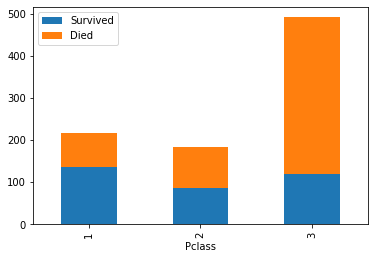

In [7]:
df['Died'] = 1 - df['Survived']
df.groupby('Pclass').sum()[['Survived', 'Died']].plot(kind='bar', stacked=True)

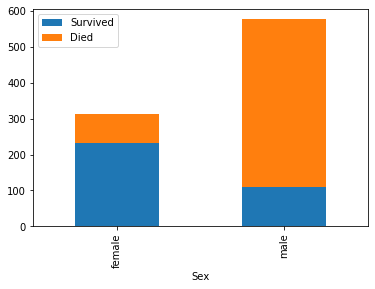

In [8]:
df.groupby('Sex').sum()[['Survived', 'Died']].plot(kind='bar', stacked=True)

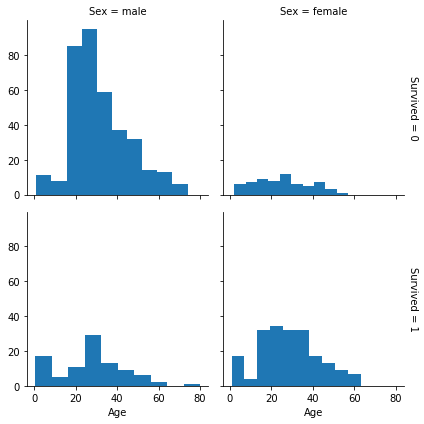

In [9]:
g = sns.FacetGrid(df, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age")

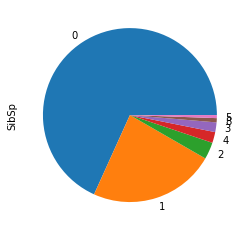

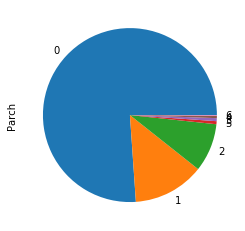

In [10]:
df['SibSp'].value_counts().plot(kind='pie')
plt.show()
df['Parch'].value_counts().plot(kind='pie')
plt.show()

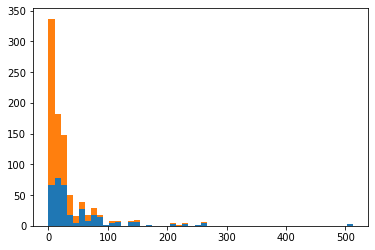

In [11]:
plt.figure()
plt.hist([df[df['Survived'] == 1]['Fare'],
          df[df['Survived'] == 0]['Fare']],
         stacked=True, bins=50,
         label = ['Survived', 'Dead'])
plt.show()

In [12]:
df['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

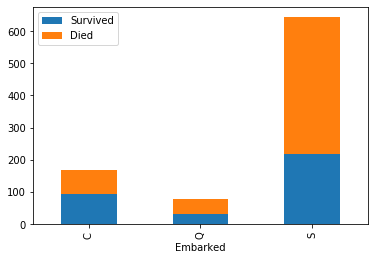

In [13]:
df.groupby('Embarked').sum()[['Survived', 'Died']].plot(kind='bar', stacked=True)

# Let's create our first model

In [14]:
df_X = df.drop(['PassengerId', 'Survived', 'Died', 'Name', 'Ticket', 'Cabin'], axis=1)
df_y = df['Survived']

df_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [15]:
df_X['Sex'] = df_X['Sex'].apply(lambda x: int(x == 'male'))
df_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,71.2833,C
2,3,0,26.0,0,0,7.9250,S
3,1,0,35.0,1,0,53.1000,S
4,3,1,35.0,0,0,8.0500,S


In [16]:
df_dummies = pd.get_dummies(df_X['Embarked'], prefix='Embarked')
df_X = pd.concat([df_X, df_dummies], axis=1)
df_X.drop('Embarked', axis=1, inplace=True)
df_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0,0,1
887,1,0,19.0,0,0,30.0000,0,0,1
888,3,0,NaN,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [17]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Pclass        891 non-null int64
Sex           891 non-null int64
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


# Missing values

* Why this value is missing?
* Fillna
    * value outsite (tree based)
    * mean, median
    * just ignore

In [18]:
df_y = df_y[~df_X['Age'].isna()]
df_X = df_X[~df_X['Age'].isna()]
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 9 columns):
Pclass        714 non-null int64
Sex           714 non-null int64
Age           714 non-null float64
SibSp         714 non-null int64
Parch         714 non-null int64
Fare          714 non-null float64
Embarked_C    714 non-null uint8
Embarked_Q    714 non-null uint8
Embarked_S    714 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 41.1 KB


## Train simple model

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df_X, df_y, test_size=0.3)

rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
print(rf)
print('train acc=%f\n  val acc=%f' % (rf.score(X_train, y_train),
                                      rf.score(X_val, y_val)))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
train acc=0.979960
  val acc=0.748837


# Feature generation!
sources: https://www.kaggle.com/c/titanic/discussion

We have information about family member, lets create a some new features based on family size.
Large families are usually grouped and support together, hence they are more likely to get rescued than those were travelling alone.
* FamilySize (numerical)
* FamilyType (categorical)
    + Small family
    + Big family

In [40]:
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


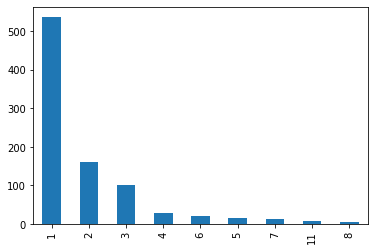

In [42]:
df['FamilySize'].value_counts().plot(kind='bar')
# lot of single persons, maybe singleton is another good category
# < 4 small families (?)

In [22]:
def family_type(x):
    if x == 1:
        return 'singleton'
    if x < 4:
        return 'small'
    return 'big'

df['FamilyType'] = df['FamilySize'].apply(family_type)

In [23]:
def to_categorical(df, idx):
    df_dummies = pd.get_dummies(df[idx], prefix=idx)
    df = pd.concat([df, df_dummies], axis=1)
    return df.drop(idx, axis=1)

In [24]:
df = to_categorical(df, 'FamilyType')

![](res/cabin.png)

In [25]:
df['Cabin'] = df['Cabin'].fillna('U')
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
df = to_categorical(df, 'Cabin')

In [26]:
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [27]:
import re
title = df['Name'].apply(lambda x: re.search('.*, ((\w| )*)\..*', x).group(1))
title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Don               1
Ms                1
Lady              1
the Countess      1
Capt              1
Jonkheer          1
Mme               1
Name: Name, dtype: int64

In [28]:
title_map = { 
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Miss',
    'Master': 'Mr',
    'Dr': 'Gov',
    'Rev': 'Gov',
    'Col': 'Gov' ,
    'Mlle': 'Miss',
    'Major': 'Gov',
    'Don': 'Royal',
    'Capt': 'Gov',
    'Lady': 'Royal',
    'Jonkheer': 'Royal',
    'Sir': 'Royal',
    'Mme': 'Miss',
    'the Countess': 'Royal',
    'Ms': 'Miss'
}
df['Title'] = title.apply(lambda x: title_map[x])
df = to_categorical(df, 'Title')

In [29]:
df = to_categorical(df, 'Embarked')
df['Sex'] = df['Sex'].apply(lambda x: int(x == 'male'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 31 columns):
PassengerId             891 non-null int64
Survived                891 non-null int64
Pclass                  891 non-null int64
Name                    891 non-null object
Sex                     891 non-null int64
Age                     714 non-null float64
SibSp                   891 non-null int64
Parch                   891 non-null int64
Ticket                  891 non-null object
Fare                    891 non-null float64
Died                    891 non-null int64
FamilySize              891 non-null int64
FamilyType_big          891 non-null uint8
FamilyType_singleton    891 non-null uint8
FamilyType_small        891 non-null uint8
Cabin_A                 891 non-null uint8
Cabin_B                 891 non-null uint8
Cabin_C                 891 non-null uint8
Cabin_D                 891 non-null uint8
Cabin_E                 891 non-null uint8
Cabin_F                 891 n

In [30]:
grouped_ages = df_X.groupby(['Sex', 'Pclass']).median().Age

def fill_age(row):
    if not np.isnan(row['Age']):
        return row
    row['Age'] = grouped_ages.loc[row['Sex'], row['Pclass']]
    return row

grouped_ages

Sex  Pclass
0    1         35.0
     2         28.0
     3         21.5
1    1         40.0
     2         30.0
     3         25.0
Name: Age, dtype: float64

In [31]:
df_X = df_X.apply(fill_age, axis=1)
X_train, X_val, y_train, y_val = train_test_split(df_X, df_y, test_size=0.2)

In [32]:
rf = RandomForestClassifier().fit(X_train, y_train)
print('train acc=%f\n  val acc=%f' % (rf.score(X_train, y_train),
                                      rf.score(X_val, y_val)))

train acc=0.970228
  val acc=0.804196


# Hyperparameter Tuning

In [33]:
print(rf.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [34]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = list(range(200, 2001, 200))
max_features = ['auto', 'sqrt']
max_depth = list(range(10, 111, 10))
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [35]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid,
                               n_iter=100,
                               cv=3,
                               verbose=2,
                               random_state=42,
                               n_jobs = -1)

# rf_random.fit(df_X, df_y)

In [36]:
#best_rf = rf_random.best_estimator_
#print('train acc=%f\n  val acc=%f' % (best_rf.score(X_train, y_train),
#                                      best_rf.score(X_val, y_val)))